In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sys
import os

parent_dir = os.path.dirname(os.path.realpath('../analysis'))

# Add the parent directory to sys.path
sys.path.append(parent_dir)

# Import the module from the parent directory
import analysis.model_assessment
import analysis.train_data_analysis
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from scipy.stats import gaussian_kde

In [2]:
data = np.load('../../train_no_clouds.npz')
refls = data['output_rfl']
wv = data['output_wv']
fids = data['output_idx']

values, counts = np.unique(fids, return_counts=True)
scenes = np.split(refls, 743)
wv_by_scene = np.split(wv, 743)
scenes = np.array(scenes)
wv_by_scene = np.array(wv_by_scene)

print(scenes.shape)
print(wv_by_scene.shape)

bad = []
for i in range(wv_by_scene.shape[0]):
    scene = wv_by_scene[i].copy()
    if scene[np.where((scene > 5) | (scene < 0))].shape[0] != 0:
        bad.append(i)

wv_by_scene = np.delete(wv_by_scene, bad, axis = 0)
scenes = np.delete(scenes, bad, axis = 0)

scenes = scenes[:, :, 60:100]

print(scenes.shape)
print(wv_by_scene.shape)

(743, 1242, 285)
(743, 1242)
(649, 1242, 40)
(649, 1242)


Text(0.5, 1.0, 'Gaussian KDE Scatter Plot for DT (test size 0.2)')

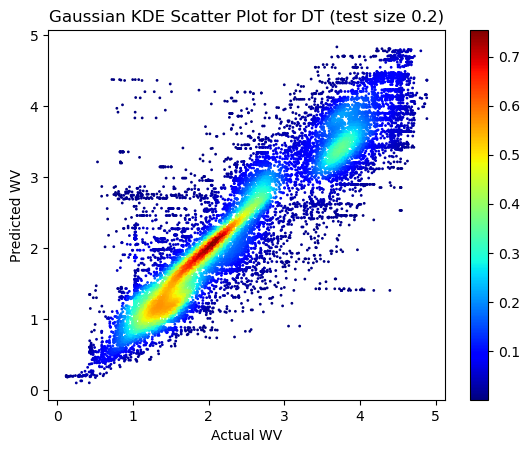

In [5]:
from sklearn.model_selection import train_test_split

np.random.seed(42)
X_idx = np.random.choice(649, 100)
#X_idx = np.arange(649)
y_idx = X_idx
X_train_idx, X_test_idx, y_train_idx, y_test_idx = train_test_split(X_idx, y_idx, test_size = 0.2, random_state = 50)

X_train = scenes[X_train_idx, :, :]
X_train = X_train.reshape((X_train.shape[0]*X_train.shape[1], X_train.shape[2]))
X_test = scenes[X_test_idx, :, :]
X_test = X_test.reshape((X_test.shape[0]*X_test.shape[1], X_test.shape[2]))
y_train = wv_by_scene[y_train_idx, :]
y_train = y_train.flatten()
y_test = wv_by_scene[y_test_idx, :]
y_test = y_test.flatten()


dt = DecisionTreeRegressor(random_state = 0)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

xy_model = np.vstack([y_test, y_pred])
z_model = gaussian_kde(xy_model)(xy_model)
plt.scatter(y_test, y_pred, c=z_model, s=1, cmap="jet")
plt.colorbar()
plt.xlabel('Actual WV')
plt.ylabel('Predicted WV')
plt.title('Gaussian KDE Scatter Plot for DT (test size 0.2)')

Text(0.5, 1.0, 'Gaussian KDE Scatter Plot for DT (test size 0.3)')

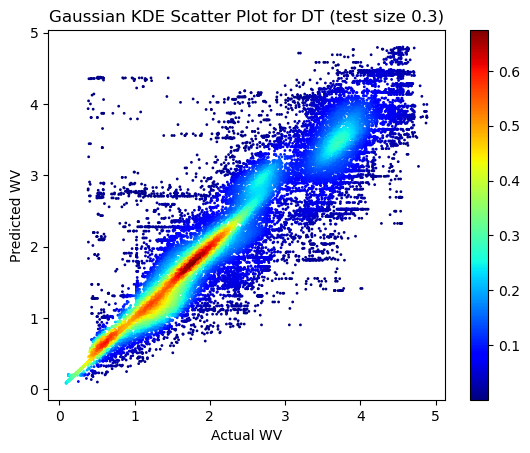

In [6]:
from sklearn.model_selection import train_test_split

np.random.seed(42)
X_idx = np.random.choice(649, 100)
#X_idx = np.arange(649)
y_idx = X_idx
X_train_idx, X_test_idx, y_train_idx, y_test_idx = train_test_split(X_idx, y_idx, test_size = 0.3, random_state = 50)

X_train = scenes[X_train_idx, :, :]
X_train = X_train.reshape((X_train.shape[0]*X_train.shape[1], X_train.shape[2]))
X_test = scenes[X_test_idx, :, :]
X_test = X_test.reshape((X_test.shape[0]*X_test.shape[1], X_test.shape[2]))
y_train = wv_by_scene[y_train_idx, :]
y_train = y_train.flatten()
y_test = wv_by_scene[y_test_idx, :]
y_test = y_test.flatten()


dt = DecisionTreeRegressor(random_state = 0)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

xy_model = np.vstack([y_test, y_pred])
z_model = gaussian_kde(xy_model)(xy_model)
plt.scatter(y_test, y_pred, c=z_model, s=1, cmap="jet")
plt.colorbar()
plt.xlabel('Actual WV')
plt.ylabel('Predicted WV')
plt.title('Gaussian KDE Scatter Plot for DT (test size 0.3)')

Text(0.5, 1.0, 'Gaussian KDE Scatter Plot for DT (test size 0.25)')

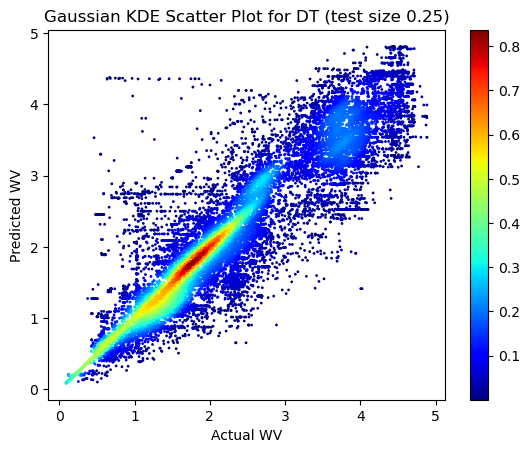

In [8]:
from sklearn.model_selection import train_test_split

np.random.seed(42)
X_idx = np.random.choice(649, 100)
#X_idx = np.arange(649)
y_idx = X_idx
X_train_idx, X_test_idx, y_train_idx, y_test_idx = train_test_split(X_idx, y_idx, test_size = 0.25, random_state = 50)

X_train = scenes[X_train_idx, :, :]
X_train = X_train.reshape((X_train.shape[0]*X_train.shape[1], X_train.shape[2]))
X_test = scenes[X_test_idx, :, :]
X_test = X_test.reshape((X_test.shape[0]*X_test.shape[1], X_test.shape[2]))
y_train = wv_by_scene[y_train_idx, :]
y_train = y_train.flatten()
y_test = wv_by_scene[y_test_idx, :]
y_test = y_test.flatten()


dt = DecisionTreeRegressor(random_state = 0)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

xy_model = np.vstack([y_test, y_pred])
z_model = gaussian_kde(xy_model)(xy_model)
plt.scatter(y_test, y_pred, c=z_model, s=1, cmap="jet")
plt.colorbar()
plt.xlabel('Actual WV')
plt.ylabel('Predicted WV')
plt.title('Gaussian KDE Scatter Plot for DT (test size 0.25)')